In [36]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [37]:
wifidf = pd.read_csv('wifidfnew.csv')

In [38]:
validationdf = pd.read_csv('validationdfnew.csv')

In [39]:
#features
X_train = pd.concat([wifidf.iloc[:, 1:521], wifidf.iloc[:, 524]], axis=1)
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0


In [40]:
y_train = wifidf.iloc[:, 521:523]
y_train.head()

,LONGITUDE,LATITUDE
0,-7541.2643,4.864921e+06
1,-7536.6212,4.864934e+06
2,-7519.1524,4.864950e+06
3,-7524.5704,4.864934e+06
4,-7632.1436,4.864982e+06


In [41]:
#Testing Set (X Testing)
X_validation = pd.concat([validationdf.iloc[:, 1:521], validationdf.iloc[:, 524]], axis=1)
X_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0


In [42]:
list(X_validation.columns)

['WAP001',
 'WAP002',
 'WAP003',
 'WAP004',
 'WAP005',
 'WAP006',
 'WAP007',
 'WAP008',
 'WAP009',
 'WAP010',
 'WAP011',
 'WAP012',
 'WAP013',
 'WAP014',
 'WAP015',
 'WAP016',
 'WAP017',
 'WAP018',
 'WAP019',
 'WAP020',
 'WAP021',
 'WAP022',
 'WAP023',
 'WAP024',
 'WAP025',
 'WAP026',
 'WAP027',
 'WAP028',
 'WAP029',
 'WAP030',
 'WAP031',
 'WAP032',
 'WAP033',
 'WAP034',
 'WAP035',
 'WAP036',
 'WAP037',
 'WAP038',
 'WAP039',
 'WAP040',
 'WAP041',
 'WAP042',
 'WAP043',
 'WAP044',
 'WAP045',
 'WAP046',
 'WAP047',
 'WAP048',
 'WAP049',
 'WAP050',
 'WAP051',
 'WAP052',
 'WAP053',
 'WAP054',
 'WAP055',
 'WAP056',
 'WAP057',
 'WAP058',
 'WAP059',
 'WAP060',
 'WAP061',
 'WAP062',
 'WAP063',
 'WAP064',
 'WAP065',
 'WAP066',
 'WAP067',
 'WAP068',
 'WAP069',
 'WAP070',
 'WAP071',
 'WAP072',
 'WAP073',
 'WAP074',
 'WAP075',
 'WAP076',
 'WAP077',
 'WAP078',
 'WAP079',
 'WAP080',
 'WAP081',
 'WAP082',
 'WAP083',
 'WAP084',
 'WAP085',
 'WAP086',
 'WAP087',
 'WAP088',
 'WAP089',
 'WAP090',
 'WAP091',

In [43]:
#Ground Truth (y_test) 
y_validation = validationdf.iloc[:, 521:523]
y_validation_count = len(y_validation.index)
print('The number of observations in the Y training set are:',str(y_validation_count))
y_validation.head()

The number of observations in the Y training set are: 1111


,LONGITUDE,LATITUDE
0,-7515.916799,4.864890e+06
1,-7383.867221,4.864840e+06
2,-7374.302080,4.864847e+06
3,-7365.824883,4.864843e+06
4,-7641.499303,4.864922e+06


In [44]:
X_train.shape, X_validation.shape

((19937, 521), (1111, 521))

In [53]:
#Models
modelknn = neighbors.KNeighborsRegressor(n_neighbors = 3)
modelRF = RandomForestRegressor()
modelLR = LogisticRegression()

In [55]:
modelknn.fit(X_train,y_train)
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
modelknn.score(X_train,y_train)

In [21]:
modelRF.score(X_train,y_train)

0.9979644694677903

In [24]:
predictions = modelRF.predict(X_validation)

In [25]:
y_validation

0       4.864890e+06
1       4.864840e+06
2       4.864847e+06
3       4.864843e+06
4       4.864922e+06
            ...     
1106    4.864796e+06
1107    4.864792e+06
1108    4.864903e+06
1109    4.864905e+06
1110    4.864904e+06
Name: LATITUDE, Length: 1111, dtype: float64

In [26]:
predictions

array([4864907.43944893, 4864835.7656417 , 4864847.79407578, ...,
       4864916.51986856, 4864926.06854679, 4864906.35548   ])

In [27]:
rmse = sqrt(mean_squared_error(y_validation, predictions))

In [28]:
predRsquared = r2_score(y_validation,predictions)

In [29]:
MAE = sum(abs(y_validation - predictions))/len(predictions)

In [30]:
#Make Predictions
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % MAE)

R Squared: 0.974
RMSE: 11.310
MAE: 7.382


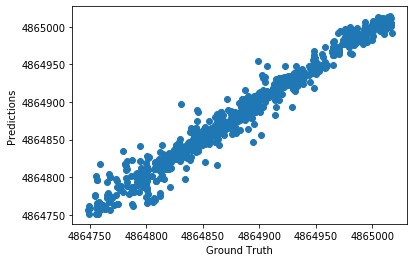

In [31]:
plt.scatter(y_validation, predictions)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [34]:
sum(abs(y_validation - predictions))

8201.718163948506